# Thoughts on the notebook
The idea behind this notebook originated from the Augerino framework. Here we are working with the MNIST dataset for a classification task. The aim is simple determine how rotation of images affect the performance of a task. I increment angle gradually starting from 0 and monitoring the accuracy. The algorithm alt when the accuracy drops below 85%. I think with this idea can be extended to our EEG data with the right tools.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist       # MNIST dataset
from tensorflow.keras.models import Sequential    # Model architecture
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense  # CNN layers
from tensorflow.keras.utils import to_categorical # One-hot encoding
from skimage.transform import rotate
import random

In [ ]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0, 1] and reshape for CNN input (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


# Convert labels to one-hot encoding (e.g., "5" becomes [0,0,0,0,0,1,0,0,0,0])
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def build_smallnet():
    """A lightweight CNN for MNIST classification."""
    model = Sequential([
        # First convolutional layer: 32 filters, 3x3 kernel
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        # Downsample with max pooling
        MaxPooling2D((2, 2)),
        # Second convolutional layer: 64 filters, 3x3 kernel
        Conv2D(64, (3, 3), activation='relu'),
        # Downsample again
        MaxPooling2D((2, 2)),
        # Flatten 2D features to 1D for dense layers
        Flatten(),
        # Fully connected layer with 64 neurons
        Dense(64, activation='relu'),
        # Output layer (10 classes for digits 0-9)
        Dense(10, activation='softmax')
    ])

    # Compile the model with Adam optimizer and cross-entropy loss
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# ----------------------------
# 3. Rotation Accuracy Evaluator
# ----------------------------
def evaluate_rotation_impact(model, X_test, y_test, max_angle=100, step=1):
    """
    Evaluates model accuracy across rotation angles (0° to max_angle).

    Args:
        model: Trained Keras model
        X_test: Test images
        y_test: Test labels
        max_angle: Maximum rotation angle (default: 100°)
        step: Angle increment step (default: 1°)

    Returns:
        results: Dictionary {angle: accuracy}
        critical_angle: First angle where accuracy drops below 90%
    """
    angles = range(0, max_angle + 1, step)
    results = {}
    critical_angle = None

    for angle in angles:
        # Rotate images with nearest-neighbor interpolation
        X_rotated = np.array([rotate(img.squeeze(), angle, order=0, preserve_range=True)
                             for img in X_test])
        X_rotated = X_rotated.reshape(-1, 28, 28, 1)

        # Evaluate accuracy
        _, acc = model.evaluate(X_rotated, y_test, verbose=0)
        results[angle] = acc

    return results

In [ ]:
# ----------------------------
# 4. Visualize Results
# ----------------------------
def plot_rotation_impact(results, critical_angle=None):
    angles = list(results.keys())
    accuracies = list(results.values())

    plt.figure(figsize=(12, 6))
    plt.plot(angles, accuracies, 'b-', linewidth=2, label='Accuracy')
    plt.axhline(y=0.85, color='r', linestyle='--', label='90% Threshold')

    if critical_angle:
        plt.axvline(x=critical_angle, color='g', linestyle='--',
                   label=f'Critical Angle: {critical_angle}°')

    plt.title('Model Accuracy vs Image Rotation Angle', fontsize=14)
    plt.xlabel('Rotation Angle (degrees)', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.ylim(0, 1.0)
    plt.xticks(np.arange(0, 101, 10))
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

In [ ]:
# Preprocessing the Test set
angleX0 = list()
X_temp = list()
for i in range(0,int(X_test.shape[0]/4)):
    angle = int(random.uniform(40,50))
    X_temp.append(rotate(X_test[i],angle,preserve_range=True, order=0))
    angleX0.append(angle)
X_test0 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
angle1 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,10))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle1.append(angle)
X_train1 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model1 = build_smallnet()
history1 = model1.fit(X_train1, y_train, epochs=5, batch_size=64, validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8550 - loss: 0.5023 - val_accuracy: 0.9733 - val_loss: 0.0893
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9785 - loss: 0.0708 - val_accuracy: 0.9822 - val_loss: 0.0591
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9852 - loss: 0.0465 - val_accuracy: 0.9844 - val_loss: 0.0525
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9891 - loss: 0.0338 - val_accuracy: 0.9865 - val_loss: 0.0465
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9919 - loss: 0.0261 - val_accuracy: 0.9884 - val_loss: 0.0421


In [ ]:
accuracy_results1 = evaluate_rotation_impact(model1, X_test0, y_test[:2500])

In [ ]:
angle2 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,20))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle2.append(angle)
X_train2 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model2 = build_smallnet()
history2 = model2.fit(X_train2, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8520 - loss: 0.4899 - val_accuracy: 0.9716 - val_loss: 0.0936
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9748 - loss: 0.0766 - val_accuracy: 0.9843 - val_loss: 0.0548
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.0505 - val_accuracy: 0.9842 - val_loss: 0.0506
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9891 - loss: 0.0362 - val_accuracy: 0.9869 - val_loss: 0.0473
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9906 - loss: 0.0281 - val_accuracy: 0.9843 - val_loss: 0.0524


In [ ]:
accuracy_results2 = evaluate_rotation_impact(model2, X_test0, y_test[:2500])

In [ ]:
angle3 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,30))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle3.append(angle)
X_train3 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model3 = build_smallnet()
history3 = model3.fit(X_train3, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8339 - loss: 0.5187 - val_accuracy: 0.9650 - val_loss: 0.1122
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9743 - loss: 0.0819 - val_accuracy: 0.9790 - val_loss: 0.0712
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9828 - loss: 0.0579 - val_accuracy: 0.9797 - val_loss: 0.0655
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9860 - loss: 0.0433 - val_accuracy: 0.9835 - val_loss: 0.0560
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9899 - loss: 0.0332 - val_accuracy: 0.9848 - val_loss: 0.0505


In [ ]:
accuracy_results3 = evaluate_rotation_impact(model3, X_test0, y_test[:2500])

In [ ]:
angle4 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,40))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle4.append(angle)
X_train4 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model4 = build_smallnet()
history4 = model4.fit(X_train4, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8218 - loss: 0.5617 - val_accuracy: 0.9683 - val_loss: 0.1022
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9696 - loss: 0.0954 - val_accuracy: 0.9697 - val_loss: 0.0986
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9796 - loss: 0.0626 - val_accuracy: 0.9758 - val_loss: 0.0766
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9847 - loss: 0.0502 - val_accuracy: 0.9797 - val_loss: 0.0647
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9885 - loss: 0.0379 - val_accuracy: 0.9833 - val_loss: 0.0532


In [ ]:
accuracy_results4 = evaluate_rotation_impact(model4, X_test0, y_test[:2500])

In [ ]:
angle5 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,50))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle5.append(angle)
X_train5 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model5 = build_smallnet()
history5 = model5.fit(X_train5, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8369 - loss: 0.5432 - val_accuracy: 0.9597 - val_loss: 0.1285
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9671 - loss: 0.1049 - val_accuracy: 0.9722 - val_loss: 0.0878
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9791 - loss: 0.0685 - val_accuracy: 0.9765 - val_loss: 0.0780
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9855 - loss: 0.0470 - val_accuracy: 0.9794 - val_loss: 0.0681
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9872 - loss: 0.0390 - val_accuracy: 0.9825 - val_loss: 0.0557


In [ ]:
accuracy_results5 = evaluate_rotation_impact(model5, X_test0, y_test[:2500])

In [ ]:
angle6 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,60))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle6.append(angle)
X_train6 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model6 = build_smallnet()
history6 = model6.fit(X_train6, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8093 - loss: 0.6008 - val_accuracy: 0.9607 - val_loss: 0.1234
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9612 - loss: 0.1205 - val_accuracy: 0.9726 - val_loss: 0.0904
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9750 - loss: 0.0802 - val_accuracy: 0.9752 - val_loss: 0.0802
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9791 - loss: 0.0637 - val_accuracy: 0.9783 - val_loss: 0.0747
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9858 - loss: 0.0468 - val_accuracy: 0.9787 - val_loss: 0.0728


In [ ]:
accuracy_results6 = evaluate_rotation_impact(model6, X_test0, y_test[:2500])

In [ ]:
angle7 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,70))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle7.append(angle)
X_train7 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model7 = build_smallnet()
history7 = model7.fit(X_train7, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7940 - loss: 0.6549 - val_accuracy: 0.9581 - val_loss: 0.1404
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9583 - loss: 0.1356 - val_accuracy: 0.9684 - val_loss: 0.0998
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9720 - loss: 0.0855 - val_accuracy: 0.9758 - val_loss: 0.0812
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9792 - loss: 0.0658 - val_accuracy: 0.9730 - val_loss: 0.0861
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9843 - loss: 0.0480 - val_accuracy: 0.9799 - val_loss: 0.0724


In [ ]:
accuracy_results7 = evaluate_rotation_impact(model7, X_test0, y_test[:2500])

In [ ]:
angle8 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,80))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle8.append(angle)
X_train8 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model8 = build_smallnet()
history8 = model8.fit(X_train8, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8488 - loss: 0.4984 - val_accuracy: 0.9786 - val_loss: 0.0734
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9780 - loss: 0.0693 - val_accuracy: 0.9791 - val_loss: 0.0662
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9842 - loss: 0.0498 - val_accuracy: 0.9837 - val_loss: 0.0533
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9880 - loss: 0.0389 - val_accuracy: 0.9864 - val_loss: 0.0462
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9910 - loss: 0.0277 - val_accuracy: 0.9851 - val_loss: 0.0518


In [ ]:
accuracy_results8 = evaluate_rotation_impact(model8, X_test0, y_test[:2500])

In [ ]:
angle9 = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,90))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angle9.append(angle)
X_train9 = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
model9 = build_smallnet()
history9 = model9.fit(X_train9, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8619 - loss: 0.4650 - val_accuracy: 0.9755 - val_loss: 0.0786
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9792 - loss: 0.0664 - val_accuracy: 0.9812 - val_loss: 0.0612
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9866 - loss: 0.0451 - val_accuracy: 0.9852 - val_loss: 0.0488
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9867 - val_loss: 0.0443
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9913 - loss: 0.0257 - val_accuracy: 0.9892 - val_loss: 0.0375


In [ ]:
accuracy_results9 = evaluate_rotation_impact(model9, X_test0, y_test[:2500])

In [ ]:
angleX = list()
X_temp = list()
for i in range(0,X_train.shape[0]):
    angle = int(random.uniform(0,100))
    X_temp.append(rotate(X_train[i],angle,preserve_range=True, order=0))
    angleX.append(angle)
X_trainX = np.array(X_temp).reshape(-1, 28, 28, 1)

In [ ]:
modelX = build_smallnet()
historyX = modelX.fit(X_trainX, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8507 - loss: 0.4872 - val_accuracy: 0.9726 - val_loss: 0.0881
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9791 - loss: 0.0683 - val_accuracy: 0.9840 - val_loss: 0.0553
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9855 - loss: 0.0450 - val_accuracy: 0.9853 - val_loss: 0.0499
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9890 - loss: 0.0335 - val_accuracy: 0.9868 - val_loss: 0.0459
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9910 - loss: 0.0276 - val_accuracy: 0.9879 - val_loss: 0.0460


In [ ]:
accuracy_resultsX = evaluate_rotation_impact(modelX, X_test0, y_test[:2500])

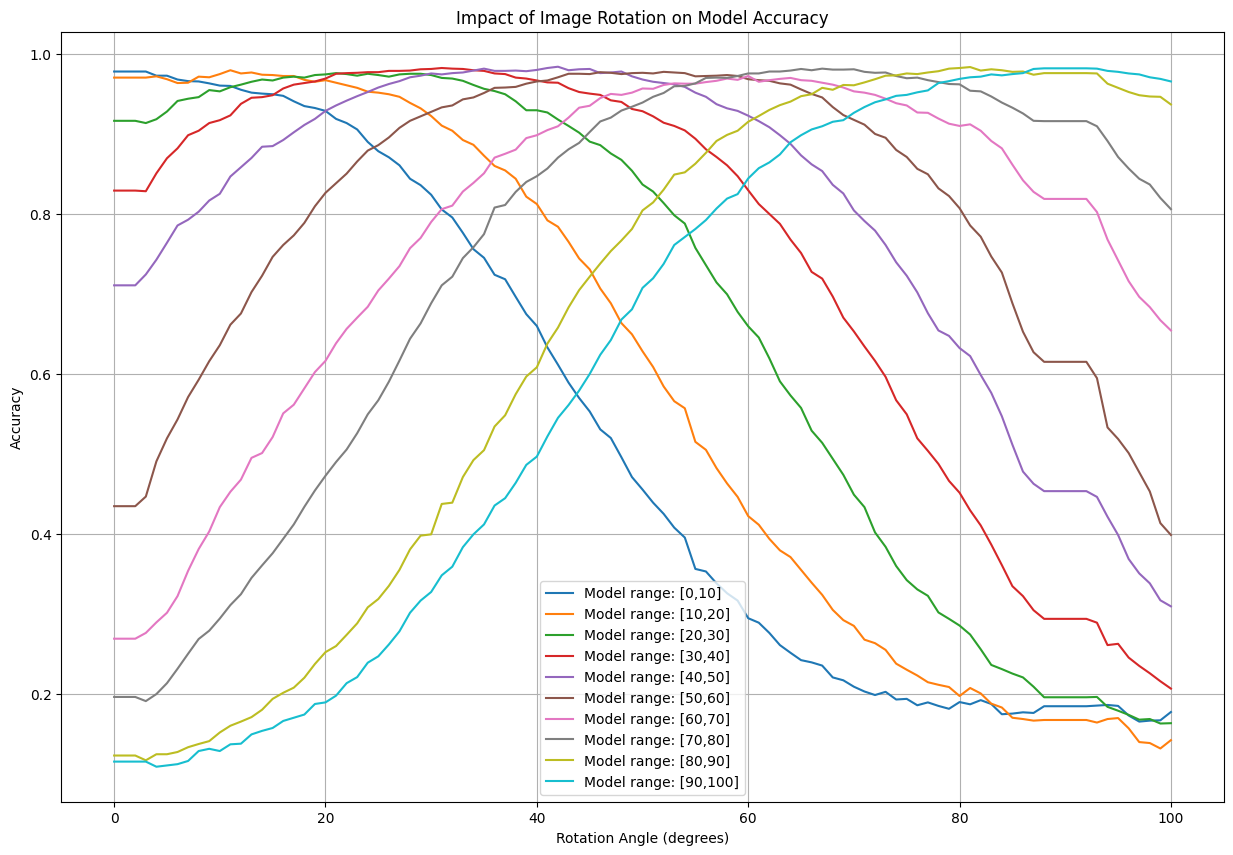

In [ ]:
import matplotlib.pyplot as plt

# Create a new figure
plt.figure(figsize=(15, 10))

# List of all your accuracy results
all_results = [
    accuracy_results1, accuracy_results2, accuracy_results3,
    accuracy_results4, accuracy_results5, accuracy_results6,
    accuracy_results7, accuracy_results8, accuracy_results9, accuracy_resultsX
]

# Plot each one
labels = ['Model range: [0,10]', 'Model range: [0,20]', 'Model range: [0,30]', 'Model range: [0,40]', 'Model range: [0,50]',
          'Model range: [0,60]', 'Model range: [0,70]', 'Model range: [0,80]', 'Model range: [0,90]', 'Model range: [0,100]']
for i, results in enumerate(all_results):
    rotations = list(results.keys())
    accuracies = list(results.values())
    plt.plot(rotations, accuracies, label=labels[i])

plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Accuracy')
plt.title('Impact of Image Rotation on Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

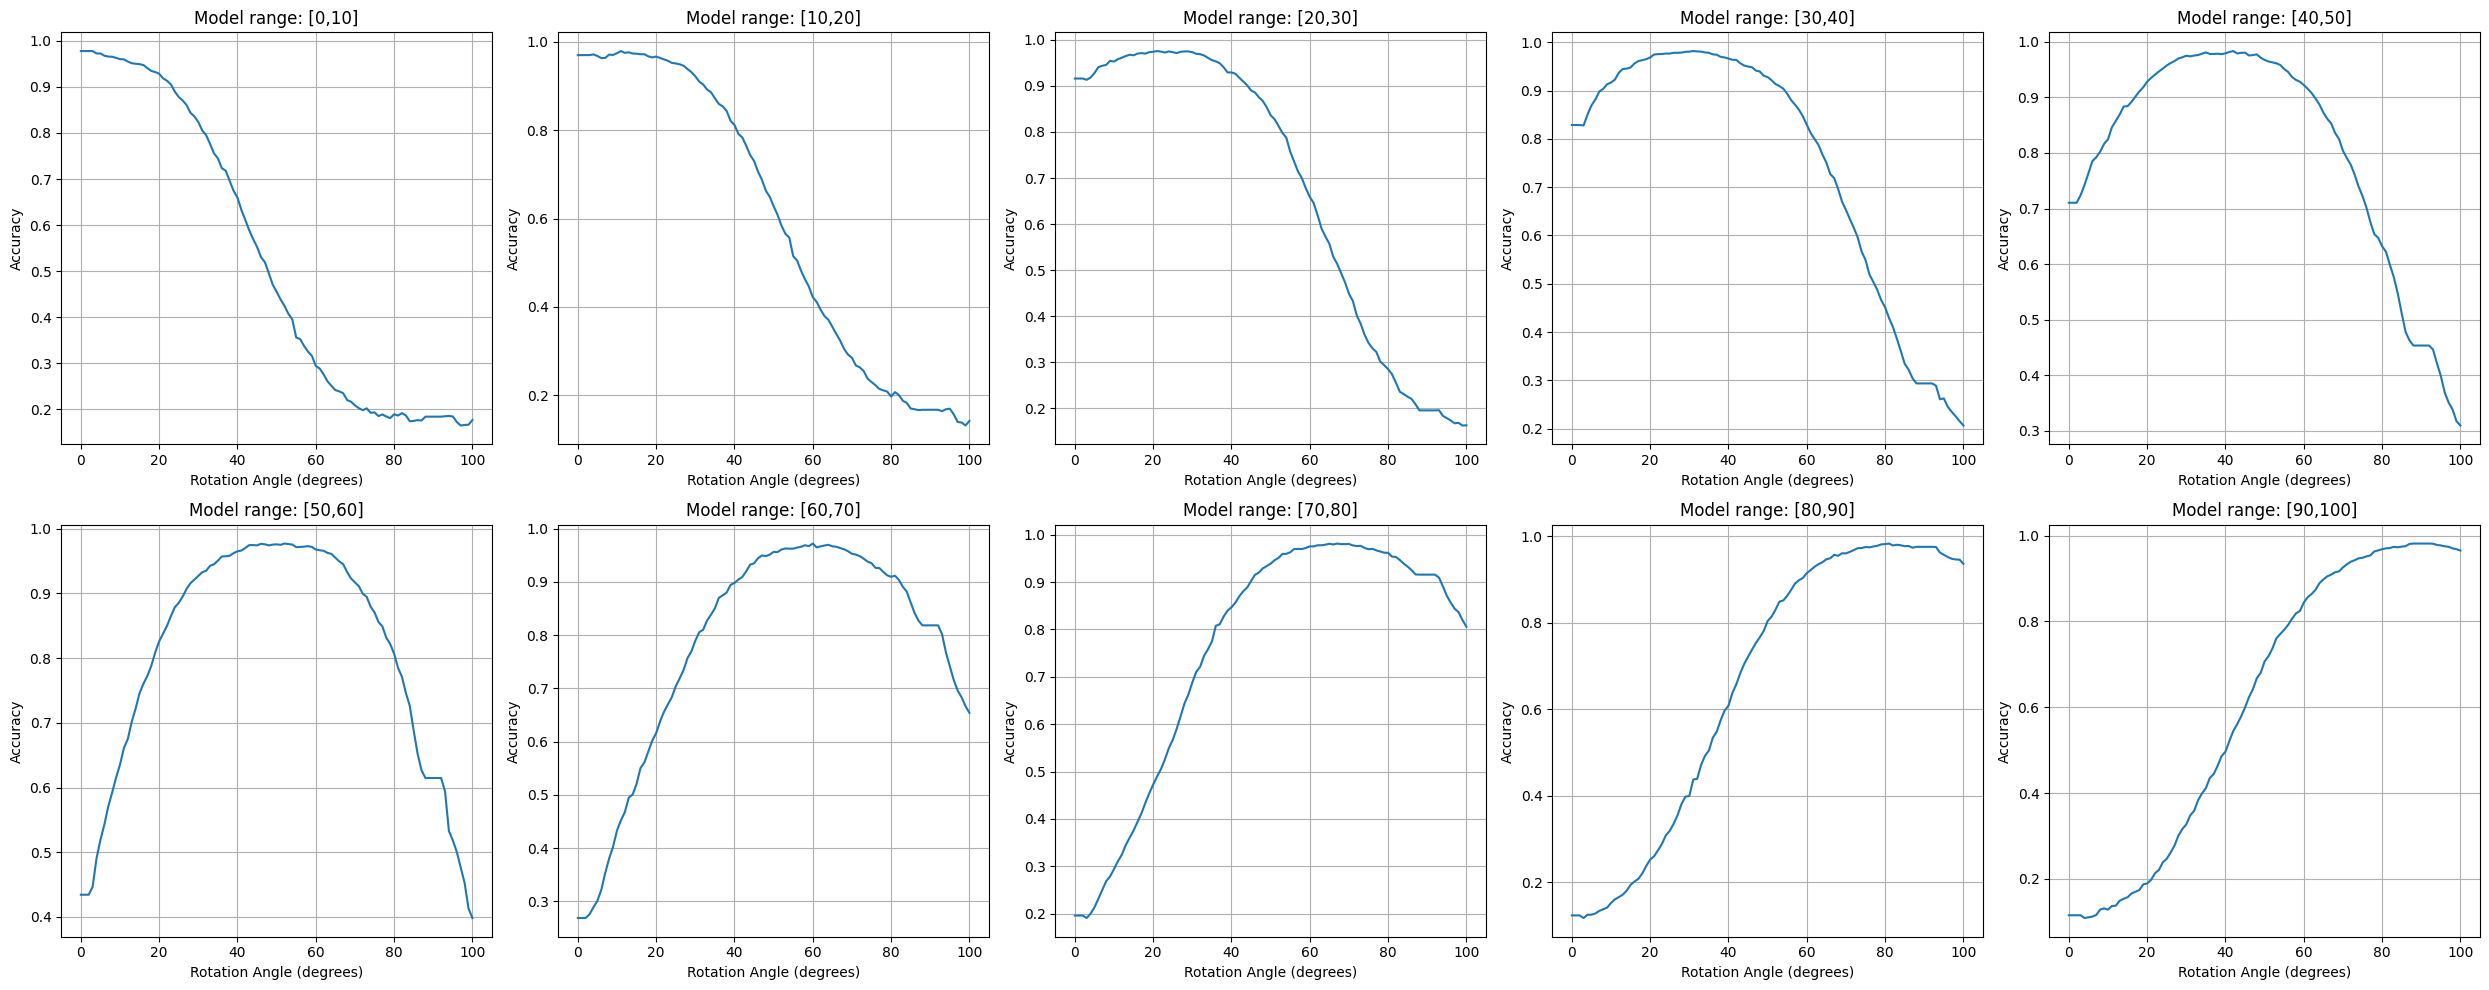

In [ ]:
import matplotlib.pyplot as plt

# List of all your accuracy results and their labels
all_results = [
    accuracy_results1, accuracy_results2, accuracy_results3,
    accuracy_results4, accuracy_results5, accuracy_results6,
    accuracy_results7, accuracy_results8, accuracy_results9, accuracy_resultsX
]
labels = ['Model range: [0,10]', 'Model range: [0,20]', 'Model range: [0,30]', 'Model range: [0,40]', 'Model range: [0,50]',
          'Model range: [50,60]', 'Model range: [0,70]', 'Model range: [0,80]', 'Model range: [0,90]', 'Model range: [0,100]']

# Create a 2x5 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each dataset in its own subplot
for i, (results, label) in enumerate(zip(all_results, labels)):
    rotations = list(results.keys())
    accuracies = list(results.values())

    axes[i].plot(rotations, accuracies)
    axes[i].set_title(label)
    axes[i].set_xlabel('Rotation Angle (degrees)')
    axes[i].set_ylabel('Accuracy')
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()